# Исследование объявлений о продаже квартир

Данные: архив объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 

Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические.

**Описание данных:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Общая информация о данных.

In [2]:
data = pd.read_csv('D:/datasets/real_estate_data.csv', sep='\t') #чтение файла csv
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


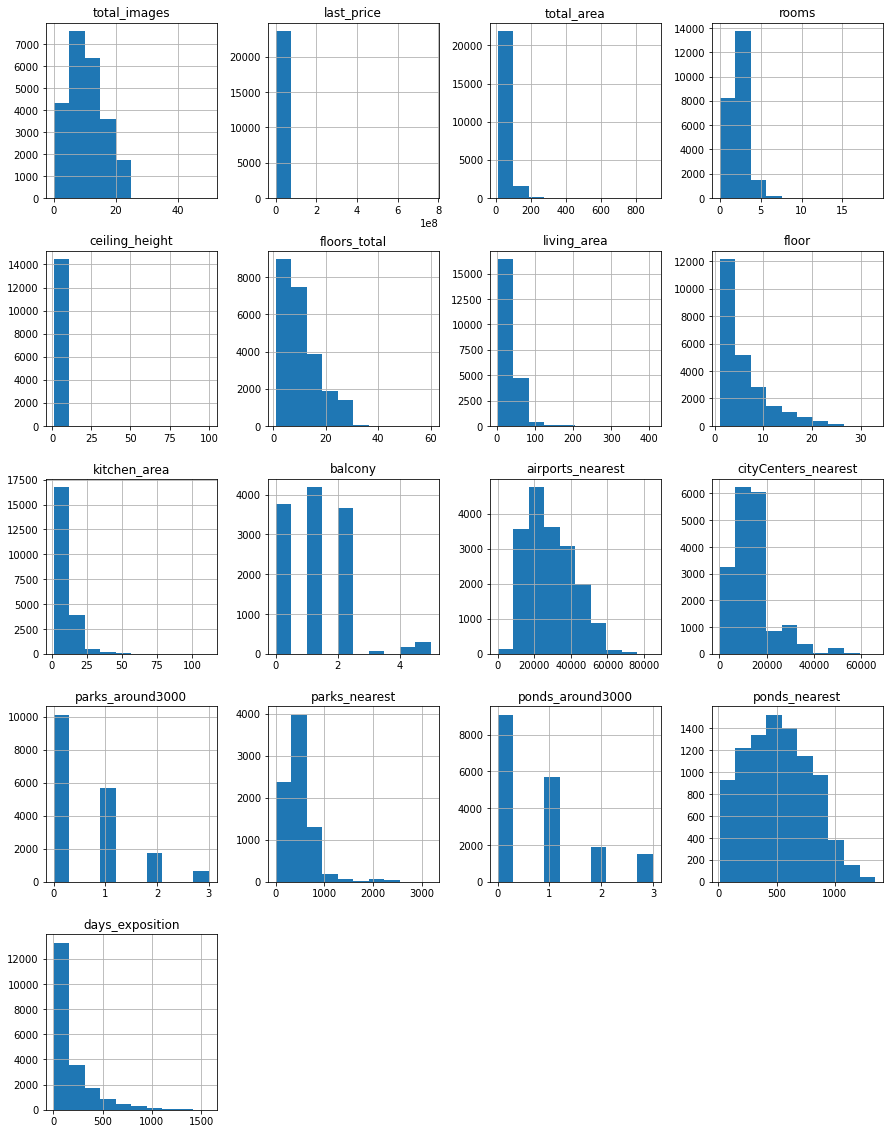

In [5]:
data.hist(figsize=(15, 20));

**Вывод по общей информации о данных:** в датасете есть пропуски, также возможны аномалии и дубли. Тип данных с датой нужно изменить на timestamp, некоторые столбцы float нужно перевести в int. Эта работа будет сделана ниже.

### Предобработка данных.

#### Работа с пропусками

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков довольно много.

- ceiling_height - можно выявить аномалии, убрать их. Оставшиеся NaN заменить на медиану с зависимостью от количества этажей в доме с категоризацией.
- living_area - можно сделать по медиане в зависимости от rooms, также проверить на аномалии сначала и убрать их.
- kitchen_area - медиана в зависимости от общей площади, сделать категоризацию и поработать с аномалиями.


- floors_total - зависимость выявить не удастся. Проще удалить данные, так как всего 86 строк. А количество этажей влияет на другие детали.
- locality_name - всего 49 значений, заменить нечем, лучше удалить, потому что эти данные важны заполненными.


- is_apartment - если не заполнено, значит False - заменить.
- balcony - если не заполнено, значит балкона нет - заменить на 0.


- airports_nearest - не трогать, заменить нечем, так как такие данные нужно точно заполнять, а это сделать невозможно.
- cityCenters_nearest - не трогать, заменить нечем.
- parks_around3000 - не трогать, заменить нечем.
- parks_nearest - не трогать, заменить нечем.
- ponds_around3000 - не трогать, заменить нечем.
- ponds_nearest - не трогать, заменить нечем.
- days_exposition - не трогать, заменить нечем. Нет прямой зависимости, которую я заранее могу проследить, без самого анализа.

##### Работа с колонками 'is_apartment' и 'balcony':

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
    
print(data['is_apartment'].isna().sum()) #проверка
data['balcony'].isna().sum() #проверка

0


0

##### Работа с колонками 'floors_total' и 'locality_name':

In [8]:
data = data.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)
print(data['floors_total'].isna().sum()) #проверка
data['locality_name'].isna().sum() #проверка

0


0

##### Работа с колонкой 'ceiling_height' и 'floors_total':

In [9]:
sorted(data['ceiling_height'].unique()) #уникальные значения

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


In [10]:
# В значениях ниже, скорее всего, была опечатка с постановкой точки. Минимальная высота потолков - 2.1м
# Замена значений с аномалиями на верные:
anomalies_ceiling = [22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0]

for index in anomalies_ceiling:
    data.loc[data['ceiling_height'] == index, 'ceiling_height'] = index / 10

# Высота потолков в квартирах не может быть меньше 2.1 метра, средняя высота 2.7м, 
# максимум квартиры бывают з-х этажные, поэтому верхнее значение - 9м.
#Замена значений с аномалиями, по которым нельзя внести точную корректировку, на Nan, чтобы потом вписать в них медиану:
data.loc[data['ceiling_height'] < 2.1, 'ceiling_height'] = np.nan
data.loc[data['ceiling_height'] > 9, 'ceiling_height'] = np.nan

In [11]:
#Сразу же провожу проверку на аномалии по количеству этажей, так как использую колонку в расчете.
data['floors_total'].value_counts() #аномалии: 52 и 60, таких всего 2.

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [12]:
data = data[(data['floors_total'] != 52) & (data['floors_total'] != 60)].reset_index(drop=True) #удаление аномалий

In [13]:
def categorize_floors (floors): #функция для категоризации по floor, чтобы значения были точнее.
    try:
        if 1 <= floors <= 9:
            return 'До 9-ти этажей'
        elif 10 <= floors <= 20:
            return '10-20 этажей'
        elif floors >= 21:
            return 'Выше 21 этажа'
    except:
        pass
    
data['floors_total_category'] = data['floors_total'].apply(categorize_floors) #применение функции

data['floors_total_category'].value_counts() #проверка

До 9-ти этажей    13686
10-20 этажей       7207
Выше 21 этажа      2670
Name: floors_total_category, dtype: int64

In [14]:
#замена Nan на медиану по 'ceiling_height' с зависимостью от 'floors_total_category':
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby(['floors_total_category'])['ceiling_height'].transform('median'))

data['ceiling_height'].isna().sum() #проверка

0

##### Работа с колонкой 'living_area' и 'rooms':

In [15]:
print(data['living_area'].min())
data['living_area'].max()

#Так как значений очень много, считаю минимум и максимум

2.0


409.7

In [16]:
data.query('living_area < 8') 
#проверка на аномалии, общие площади значительно больше, поэтому такие значения жилой площади кажутся странными

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_total_category
3227,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.70,17.0,3.0,17,False,False,False,11.0,0.0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,10-20 этажей
13836,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,False,False,False,9.0,0.0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,До 9-ти этажей
16341,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.60,5.0,6.0,1,False,False,False,17.0,0.0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,До 9-ти этажей
17481,11,2680000.0,22.0,2018-08-11T00:00:00,0,2.75,25.0,5.0,8,False,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,Выше 21 этажа
19142,19,4050000.0,33.0,2018-10-15T00:00:00,1,2.50,22.0,6.5,21,False,False,False,18.0,0.0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,Выше 21 этажа
21632,0,2330000.0,23.0,2018-01-01T00:00:00,0,2.75,24.0,2.0,22,False,True,False,NaN,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,Выше 21 этажа
21816,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.50,9.0,5.4,1,False,False,False,9.8,0.0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,До 9-ти этажей
23440,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.00,8.0,3.0,8,False,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,До 9-ти этажей


In [17]:
#будем считать аномальными значениями площадь квартиры до 8 кв.м. Замена на NaN:
data.loc[data['living_area'] < 8, 'living_area'] = np.nan

In [18]:
#поиск аномалий в rooms, так как буду использовать колонку для расчетов:
print(data['rooms'].value_counts()) 
#аномалии в виде 0 (количество 194 строки) Это менее 1% от датасета, я решила удалить пропуски:

data = data[data['rooms'] != 0].reset_index(drop=True)

1     8003
2     7896
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


In [19]:
#замена Nan на медиану по 'living_area' с зависимостью от 'rooms':
data['living_area'] = data['living_area'].fillna(data.groupby(['rooms'])['living_area'].transform('median'))

print(data['living_area'].isna().sum())

0


##### Работа с колонкой 'kitchen_area':

In [20]:
print(data['kitchen_area'].min())
print(data['kitchen_area'].max())
#В текущих реалиях такие цифры не могут точно указать на аномальность, поэтому ничего не буду менять

def categorize_area (area): #функция для категоризации по area
    try:
        if 1 <= area <= 30.99:
            return 'До 30 кв.м'
        elif 31 <= area <= 60.99:
            return '31-60 кв.м'
        elif area >= 61:
            return 'Больше 61 кв.м'
    except:
        pass
    
data['total_area_category'] = data['total_area'].apply(categorize_area) #применение функции

data['total_area_category'].value_counts() #проверка

1.3
112.0


31-60 кв.м        14111
Больше 61 кв.м     8298
До 30 кв.м          960
Name: total_area_category, dtype: int64

In [21]:
#замена Nan на медиану по 'kitchen_area' с зависимостью от 'living_area':
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['total_area_category'])['kitchen_area'].transform('median'))

print(data['kitchen_area'].isna().sum())

0


In [22]:
data.isna().sum() #итог работы над пропусками

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5447
cityCenters_nearest       5424
parks_around3000          5423
parks_nearest            15369
ponds_around3000          5423
ponds_nearest            14402
days_exposition           3157
floors_total_category        0
total_area_category          0
dtype: int64

**Итог:**
    
1. В столбце 'balcony' все NaN заменены на 0.
2. В столбце 'is_apartment' все NaN заменены на False.
3. В столбцах 'floors_total' (86 NaN значений) и 'locality_name' (49 NaN значений) удалены.
4. В столбце 'ceiling_height' NaN заменены на медиану с зависимостью от категоризации по этажам.
5. В столбце 'living_area' NaN заменены на медиану с зависимостью от количества комнат.
6. В столбце 'kitchen_area' NaN заменены на медиану с зависимостью от категоризаци по общей площади.


Проведена проверка и работа с аномалиями в колонках:
- floors_total
- ceiling_height
- living_area
- rooms
- kitchen_area

**Причины, которые могли привести к пропускам:**
1. Если данные картографические, не было точного адреса.
2. Если это данные по балконам или апартаментам, возможно, их ввод необязателен, пропуск при вводе.
3. Данные по населенным пунктам и количеству этажей - возможна техническая ошибка.
4. Данные по высоте потолков могли быть необязательными.
5. Данные по жилой площади и площади кухни могли быть необязательными.
6. Данные по дням активности объявления должны подгружаться автоматически. То что их нет - это странно, надо написать тем, кто делал выгрузку.

#### Работа с аномалиями в других колонках

Осталось проверить на аномалии:
- balcony
- days_exposition
- first_day_exposition
- floor
- last_price
- locality_name
- total_area
- total_images

In [23]:
data['balcony'].unique() #с точностью сказать, что есть аномалии, нельзя

array([0., 2., 1., 5., 4., 3.])

In [24]:
print(data['days_exposition'].min())
data['days_exposition'].max()

#в принципе не выглядит очень плохо, вторая цифра смущает, но доказать аномалию я не могу

1.0


1580.0

In [25]:
print(data['first_day_exposition'].min())
data['first_day_exposition'].max()

#выглядит нормально

2014-11-27T00:00:00


'2019-05-03T00:00:00'

In [26]:
data['floor'].unique() #все выглядит отлично

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [27]:
print(data['last_price'].min())
data['last_price'].max()

#первая цифра странная, конечно, ниже ее проверю.

12190.0


763000000.0

In [28]:
data.query('last_price < 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_total_category,total_area_category
8677,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,False,False,False,40.5,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Выше 21 этажа,Больше 61 кв.м


In [29]:
print(len(data['last_price'])) #проверка
#да,это аномальное значение, удаляю строку:
data = data[data['last_price'] != 12190].reset_index(drop=True)
len(data['last_price']) #проверка

23369


23368

In [30]:
print(data['total_area'].min())
data['total_area'].max()

#выглядит нормально, доказать аномалии не могу

12.0


900.0

In [31]:
data['total_images'].unique() #все выглядит отлично

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [32]:
sorted(data['locality_name'].unique())
#много неявных дублей

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [33]:
data['locality_name'] = data['locality_name'].str.lower() #привожу к нижнему регистру

#значения, которые надо удалить
new_list = ['поселок', 'посёлок', 'городской', 'деревня', 'городского типа', 'село', 'станции',\
            'Пансионат', 'садоводческое некоммерческое товарищество', 'коттеджный', 'садовое товарищество'] 
#цикл для замены слов и удаление пробелов
for word in new_list:
    data['locality_name'] = data['locality_name'].str.replace(word, '').str.strip()
    
data['locality_name'].unique() #проверка

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное', 'понтонный', 'сясьстрой',
       'старая', 'лесколово', 'новый свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'оржицы', 'кальтино', 'романовка', 'бугры',
       'рощино', 'кириши', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'молодёжное', 'тихвин', 'победа', 'нурма',
       'синявино', 'тосно', 'стрельна', 'бокситогорск', 'але

In [34]:
data.duplicated().sum() #Проверила на дубликаты

0

**Особенности в данных**:

В данных было много пропусков и аномальных/неявных дублированных значений. Пропуски могли быть как намеренными, так и случайными в некоторых случаях. Много неявных дубликатов было в названиях населенных пунктов. Полных дубликатов не нашлось.

#### Работа с типами данных

Комментарии по изменению типа: 

-  first_day_exposition (object) - надо изменить на timestamp, чтобы удобно было работать с датой.
-  floors_total (float64) - надо изменить на int, так как это целое число.
-  balcony (float64) - надо изменить на int, так как это целое число.

In [35]:
#изменение типов данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

#### Аномалии в столбцах 'last_price', 'rooms', 'total_area' - срез данных

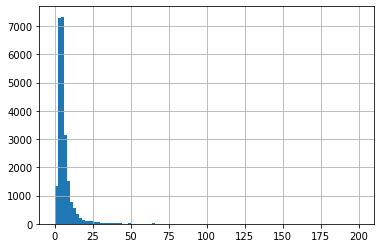

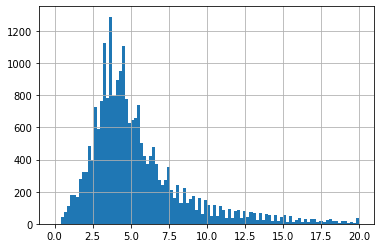

In [36]:
data['last_price_million'] = data['last_price'] / 1000000 
#эту колонку я уже создавала ниже, но теперь ее нужно создать раньше, а в след. разделе уберу этот код
data['last_price_million'].hist(bins=100, range=(0,200));
plt.show()
data['last_price_million'].hist(bins=100, range=(0,20)); #срез до 20 миллионов, чтобы точнее увидеть частотность

In [37]:
len(data[data['last_price'] > 17500000]) # Проверка количества объектов до 17.5 миллионов. 
#Всего таких объектов 903, это около 4% от данных

903

In [38]:
data_new = data[data['last_price'] < 17500000].reset_index(drop=True) #создаю новый датасет со срезом, дальше работаю с ним

21

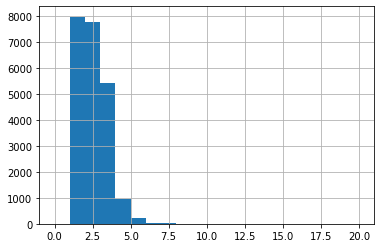

In [39]:
data_new['rooms'].hist(bins=20, range=(0,20)); #проверка по количеству комнат
len(data_new[data_new['rooms'] > 6])

In [40]:
data_new = data_new[data_new['rooms'] < 6].reset_index(drop=True) #делаю срез объектов, с количеством комнат меньше 6

92

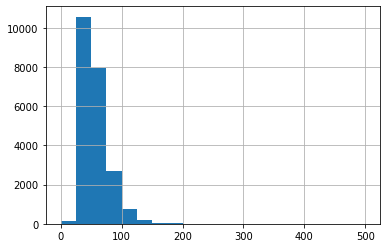

In [41]:
data_new['total_area'].hist(bins=20, range=(0,500));
len(data_new[data_new['total_area'] > 150]) #проверка количества объектов с площадью больше 150 кв.м.

In [42]:
data_new = data_new[data_new['total_area'] < 150].reset_index(drop=True) #создаю срез с общей площадью меньше 150 кв.м.

In [43]:
round(data_new.shape[0] / data.shape[0],2) #Датасет стал меньше всего на 5%.

0.95

**Промежуточный вывод:** заменены пропуски там, где это было возможно. Выявлены аномалии и изменен тип данных в некоторых столбцах.

### Новые столбцы

In [44]:
data_new['price_1m'] = data_new['last_price'] / data_new['total_area'] #цена одного квадратного метра;
data_new['day_of_public'] = data_new['first_day_exposition'].dt.weekday #день недели публикации объявления;
data_new['month_of_public'] = data_new['first_day_exposition'].dt.month #месяц публикации объявления;
data_new['year_of_public'] = data_new['first_day_exposition'].dt.year #год публикации объявления;

#тип этажа квартиры (значения — «первый», «последний», «другой»);
def categorize_floor_type (floor, total_floor):
    try:
        if floor == 1:
            return 'первый'
        elif floor == total_floor:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
    
data_new['apt_type_floor'] = data_new.apply(lambda x: categorize_floor_type(x.floor, x.floors_total), axis=1) 

data_new['apt_type_floor'].value_counts() #проверка

другой       16361
последний     3101
первый        2825
Name: apt_type_floor, dtype: int64

In [45]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data_new['km_to_center'] = round(data_new['cityCenters_nearest'] / 1000, 0)

In [46]:
data_new.head() #Проверка новых столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floors_total_category,total_area_category,last_price_million,price_1m,day_of_public,month_of_public,year_of_public,apt_type_floor,km_to_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,10-20 этажей,Больше 61 кв.м,13.000,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.70,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,10-20 этажей,31-60 кв.м,3.350,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,До 9-ти этажей,31-60 кв.м,5.196,92785.714286,3,8,2015,другой,14.0
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,10-20 этажей,Больше 61 кв.м,10.000,100000.000000,1,6,2018,другой,8.0
4,10,2890000.0,30.4,2018-09-10,1,2.70,12,14.4,5,False,False,False,9.1,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,10-20 этажей,До 30 кв.м,2.890,95065.789474,0,9,2018,другой,NaN


**Промежуточный вывод:** столбцы добавлены в датасет и проверены.

### Исследовательский анализ данных

#### Анализ общей площади

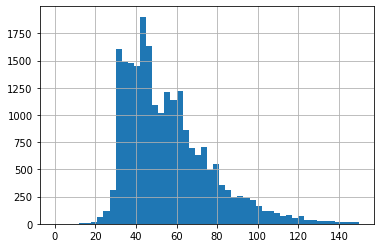

In [47]:
data_new['total_area'].hist(bins=50, range=(0,150));

По гистограмме видно, что больше всего квартир с площадью около 45 кв.м.
Квартир до 25 кв.м. крайне мало, как и квартир больше 130 кв.м., но они есть.

#### Анализ жилой площади

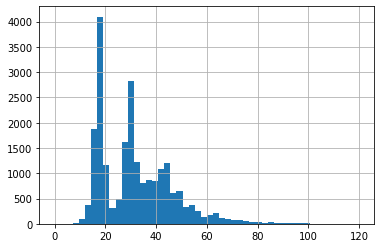

In [48]:
data_new['living_area'].hist(bins=50, range=(0,120));

Больше всего квартир с площадью около 18 кв.м. Но есть еще один пик с площадью около 30 кв.м. Квартир с жилой площадью меньше 10 и больше 80 кв.м. очень мало.

#### Анализ площади кухни

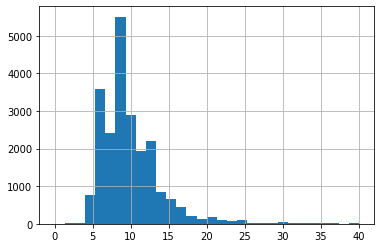

In [49]:
data_new['kitchen_area'].hist(bins=30, range=(0,40));

Пик площади приходится на примерно 8 кв.м. Есть совсем малые значения, до 5 кв.м, но их не много, так же после примерно 17 кв.м. площадь резко снижается. Крайне мало квартир с кухней больше 25 кв.м.

#### Анализ цены объекта

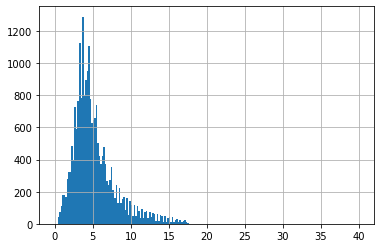

In [50]:
data_new['last_price_million'].hist(bins=200, range=(0,40));

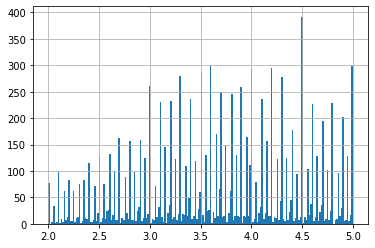

In [51]:
data_new['last_price_million'].hist(bins=200, range=(2,5)); #цена 2-5 миллионов, срез

На гистограммах видно, что чаще всего цена колеблется в районе 3-5 миллионов рублей. Квартир с ценой больше 10 миллионов крайне мало.

#### Анализ количества комнат

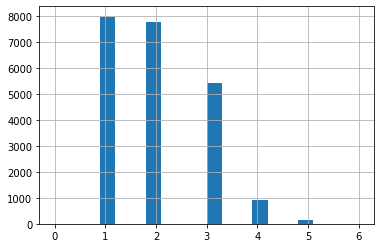

In [52]:
data_new['rooms'].hist(bins=20, range=(0,6));

Чаще всего продают квартиры с 1-3 комнатами. После 3 комнат количество квартир с другими параметрами резко уменьшается.

#### Анализ высоты потолков

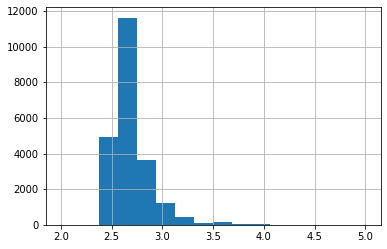

In [53]:
data_new['ceiling_height'].hist(bins=16, range=(2,5));
#так как на общей диаграмме количество объектов с высотой более 5 метров практически равно нулю, я взяла срез до 5 метров.

Чаще всего высота потолков в квартирах около 2.7 метра. Все остальные значения встречаются не так часто. Больше 3.3 метров потолки у очень малого количества квартир.

#### Анализ этажа квартир

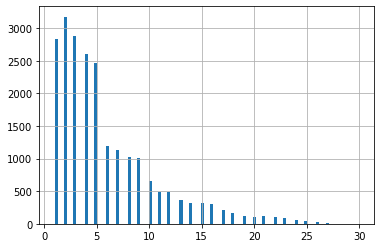

In [54]:
data_new['floor'].hist(bins=100, range=(1,30));

Чаще всего этаж 2-3, после 9 этажа количество квартир резко падает.

#### Анализ типа этажа квартир

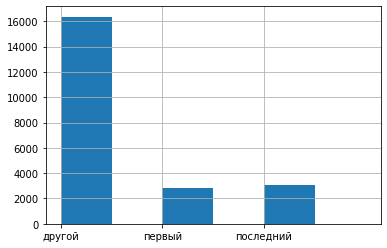

In [55]:
data_new['apt_type_floor'].hist(bins=6, range=(0,3));

Самая популярная категория - "другой". Но это ожидаемо, ведь там все этажи, кроме первого и последнего. Последний этаж бывает немного чаще первого.

#### Анализ общего количества этажей в доме

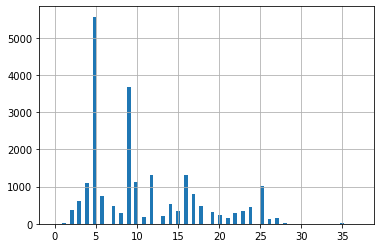

In [56]:
data_new['floors_total'].hist(bins=80, range=(0,37));

Чаще всего продают квартиры в 5-ти и 9-ти этажных домах.

#### Анализ расстояния до центра города в метрах

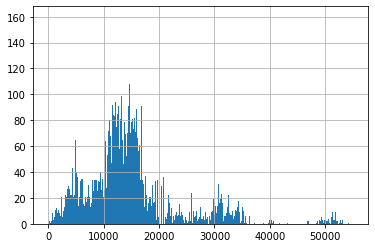

In [57]:
data_new['cityCenters_nearest'].hist(bins=1000, range=(0,55000));

Чаще всего расстрояние между 10 и 17 км.
Квартир с расстоянием более 20 км до центра значительно меньше.

#### Анализ расстояния до аэропорта в метрах

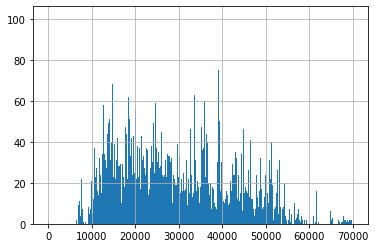

In [58]:
data_new['airports_nearest'].hist(bins=1000, range=(0,70000));

Расстояние может быть от 10000 до 40000 метров в среднем, довольно равномерно распределены данные, нет четкого пика.

#### Анализ расстояния до ближайшего парка в метрах

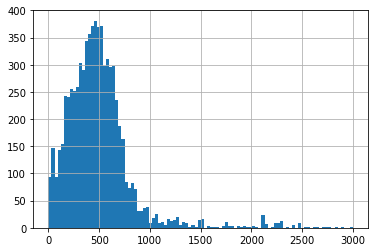

In [59]:
data_new['parks_nearest'].hist(bins=100, range=(0,3000));

Среднее расстояние до ближайшего парка - 400 метров.

Квартир с расстоянием больше 1 км крайне мало.

#### Анализ дня и месяца публикации объявление

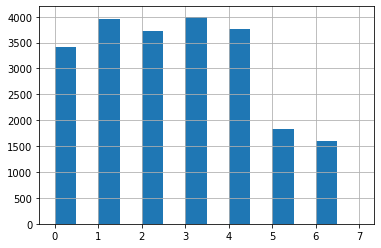

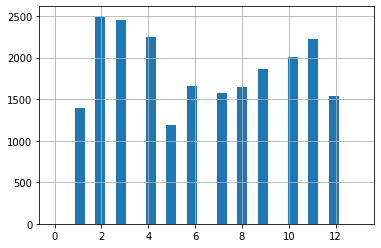

In [60]:
data_new['day_of_public'].hist(bins=14, range=(0,7))
plt.show()
data_new['month_of_public'].hist(bins=30, range=(0,13));

Больше всего объявлений о продаже квартир выкладывали во вторник и четверг.

Тоже много, но меньше: в среду и пятницу.

Меньше всего на выходных.

Больше всего объявлений выкладывали в феврале и марте.
Меньше всего - в мае.

#### Анализ скорости продажи квартир

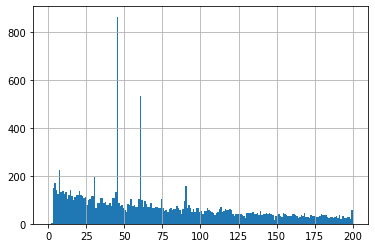

In [61]:
data_new['days_exposition'].hist(bins=200, range=(0,200));
#сделала здесь срез, чтобы четче проследить изменение, ниже полный график

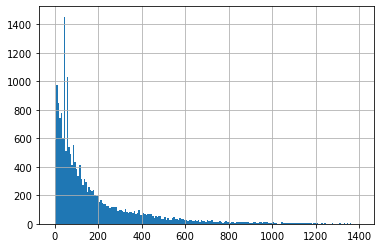

In [62]:
data_new['days_exposition'].hist(bins=200, range=(0,1400));

In [63]:
print("Среднее:", round(data_new['days_exposition'].mean()), 2)
print("Медиана:", data_new['days_exposition'].median())

Среднее: 177 2
Медиана: 93.0


Cколько времени обычно занимает продажа: пиковое значение на гистограмме - около 45 дней. Среднее не очень показательно, так как есть выбросы. Медиана показывает значение в пределах 100 дней. Будем считать, что в среднем продажа квартиры может занять 2-3 месяца.

Какие продажи можно считать быстрыми: быстрыми можно считать продажи до 1 месяца.

Какие продажи можно считать необычно долгими: больше 6 месяцев.


#### Факторы, влияющие на общую стоимость объекта:

##### Цена & общая площадь

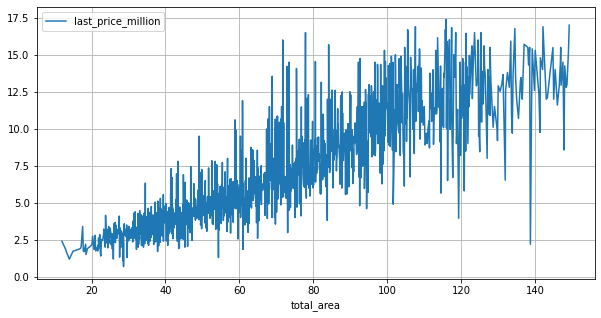

In [64]:
data_new.pivot_table(index='total_area', values='last_price_million', aggfunc='median').plot(grid=True, figsize=(10, 5));

In [65]:
print('Коэффициент Пирсона:', round(data_new['total_area'].corr(data_new['last_price_million']),2))

Коэффициент Пирсона: 0.75


Есть линейная связь между величинами. С ростом площади растет и цена.

##### Цена & жилая площадь

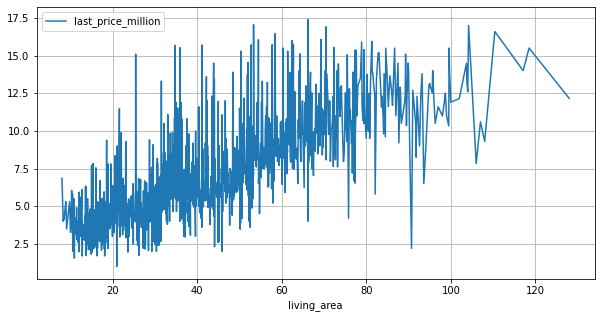

In [66]:
data_new.pivot_table(index='living_area', values='last_price_million', aggfunc='median').plot(grid=True, figsize=(10, 5));

In [67]:
print('Коэффициент Пирсона:', round(data_new['living_area'].corr(data_new['last_price_million']),2))

Коэффициент Пирсона: 0.61


Есть линейная связь между величинами. С ростом площади растет и цена.

##### Цена & площадь кухни

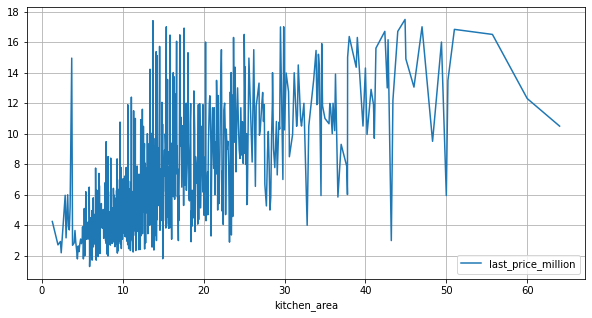

In [68]:
data_new.pivot_table(index='kitchen_area', values='last_price_million', aggfunc='median').plot(grid=True, figsize=(10, 5));

In [69]:
print('Коэффициент Пирсона:', round(data_new['kitchen_area'].corr(data_new['last_price_million']),2))

Коэффициент Пирсона: 0.55


Есть линейная связь между величинами. С ростом площади растет и цена. Но площадь кухни менее связана с ценой, чем общая и жилая площадь.

##### Цена & количество комнат

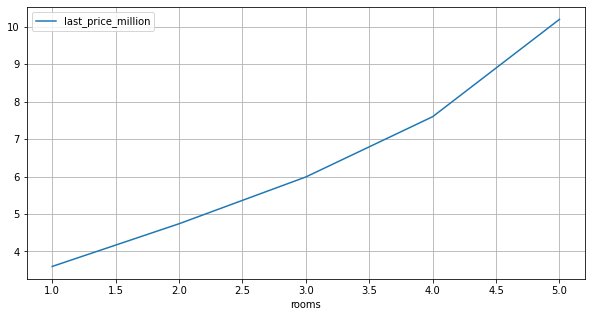

In [70]:
data_new.pivot_table(index='rooms', values='last_price_million', aggfunc='median').plot(grid=True, figsize=(10, 5));

In [71]:
print('Коэффициент Пирсона:', round(data_new['rooms'].corr(data_new['last_price_million']),2))

Коэффициент Пирсона: 0.47


Есть линейная связь между величинами. С ростом количества комнат растет и цена. Но судя по корреляции связь не очень прочная, но она есть.

##### Цена & этаж

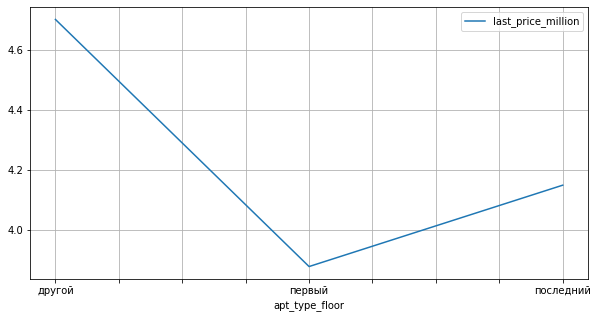

In [72]:
data_new.pivot_table(index='apt_type_floor', values='last_price_million', aggfunc='median').plot(grid=True, figsize=(10, 5));

Цена выше за этажи, которые не являются ни первыми, ни последними.
Выгоднее продавать квартиру на последнем этаже, чем на первом.

##### Цена & дата размещения

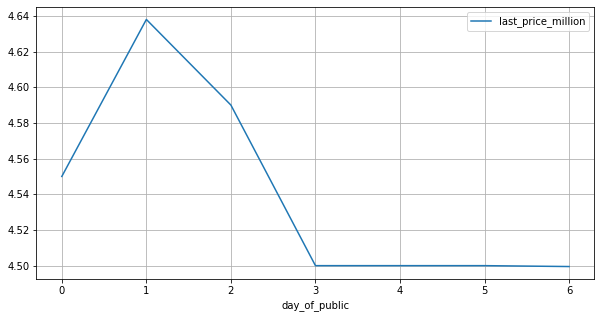

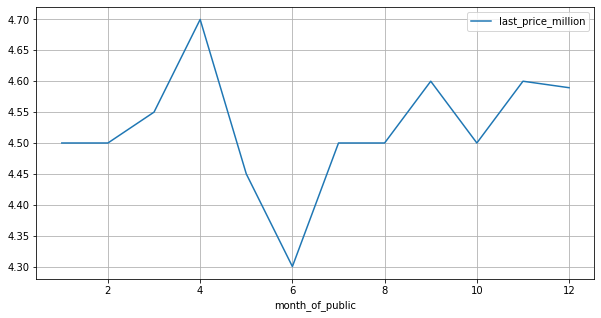

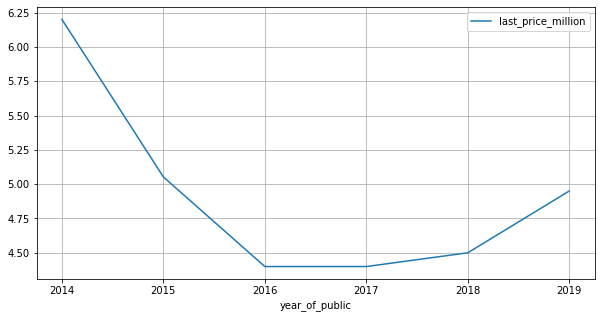

In [73]:
data_new.pivot_table(index='day_of_public', values='last_price_million', aggfunc='median').plot(grid=True, figsize=(10, 5));
plt.show()
data_new.pivot_table(index='month_of_public', values='last_price_million', aggfunc='median').plot(grid=True, figsize=(10, 5));
plt.show()
data_new.pivot_table(index='year_of_public', values='last_price_million', aggfunc='median').plot(grid=True, figsize=(10, 5));

Дороже стоили квартиры, которые выкладывали на продажу во вторник, а дешевле всего те, которые выкладывали в четверг-воскресенье.

Дороже стоили квартиры, которые выкладывали на продажу в апреле, а дешевле всего те, которые выкладывали в июне.

Дороже стоили квартиры, которые выкладывали на продажу в 2014 году, а дешевле всего те, которые выкладывали в 2016-2017 году.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [74]:
#средняя цена 1 кв.м. 
data_new.pivot_table(index='locality_name', values ='price_1m', aggfunc=('count','median')).sort_values(by='count',\
                                                                                                    ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,14503,103234.375000
мурино,559,84968.750000
кудрово,449,95185.185185
шушары,435,76666.666667
всеволожск,390,65789.473684
пушкин,355,99706.744868
колпино,337,74722.222222
парголово,322,91984.436588
гатчина,307,67796.610169


Населенные пункты с самой высокой стоимостью за 1 кв.м.: 
- Санкт-Петербург, 
- Пушкин, 
- Парголово, 
- Кудрино, 
- Мурино.

Населенные пункты с самой низкой стоимостью за 1 кв.м.: 
- Шушары, 
- Всеволжск, 
- Колпино, 
- Гатчина, 
- Выборг. 

#### Средняя цена каждого километра в Санкт-Петербурге

In [75]:
#средняя цена каждого километра в Санкт-Петербурге
data_new.query('locality_name == "санкт-петербург"').pivot_table(index='km_to_center', values='price_1m', \
                                                                 aggfunc=('mean','median')).head(21)

,mean,median
km_to_center,,
0.0,122387.691331,109031.632653
1.0,128132.371121,117366.807523
2.0,124055.844732,116883.116883
3.0,113603.021711,107567.567568
4.0,120943.807218,113314.447592
5.0,124717.818353,121851.995184
6.0,126516.512134,120767.494357
7.0,122381.437610,116537.324464
8.0,120846.618915,118694.861765


(0.0, 20.0)

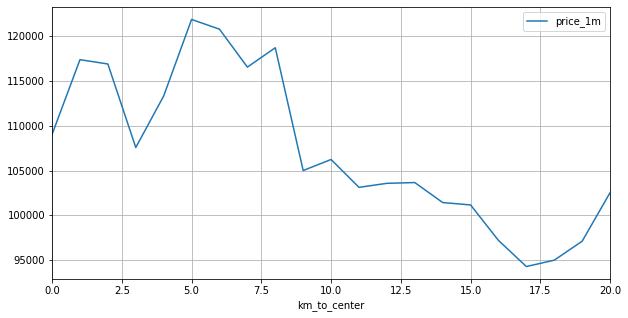

In [76]:
#график по км до центра
data_new.query('locality_name == "санкт-петербург"').pivot_table(index='km_to_center', values='price_1m', \
                                                                 aggfunc='median').head(21).plot(grid=True, figsize=(10, 5))
plt.xlim(0, 20)

In [77]:
print('Коэффициент Пирсона:', round(data_new['km_to_center'].corr(data_new['price_1m']),2))

Коэффициент Пирсона: -0.39


Как стоимость объектов зависит от расстояния до центра города: дороже всего квартиры в 5 км от центра города, после 8 км цена начинает падать, к 20 км снова возрастает.

Корреляция показывает, что при увеличении цены уменьшается количество км от центра, и наоборот. Но связь не очень прочная.

### Общий вывод

Выполнена предобработка данных, найдены интересные особенности и зависимости, которые существуют на рынке недвижимости.

В рамках предобработки обработаны пропуски, выявлены и устранены аномалии.

В рамках анализа данных построены гистограммы по всем важным показателям. Выявлены отклонения некоторых значений, эти отклонения также были проверены на аномальность.

**Анализ по отдельным столбцам выявил такие особенности рынка:**
1. Общая площадь квартир: чаще других встречается значение около 45 кв.м. Квартир до 25 кв.м. крайне мало, как и квартир больше 130 кв.м., но они есть.
2. Жилая площадь: больше всего квартир с площадью около 18 кв.м. Но есть еще один пик с площадью около 30 кв.м. Квартир с жилой площадью меньше 10 и больше 80 кв.м. очень мало.
3. Площадь кухни: пик площади приходится на примерно 8 кв.м. Есть совсем малые значения, до 5 кв.м, но их не много, так же после примерно 17 кв.м. площадь резко снижается. Крайне мало квартир с кухней больше 25 кв.м.
4. Цена объекта: чаще всего цена колеблется в районе 3-5 миллионов рублей. Квартир с ценой больше 10 миллионов крайне мало.
5. Количество комнат: чаще всего продают квартиры с 1-3 комнатами. Количество квартир с 3+ комнатами намного меньше.
6. Высота потолка: чаще всего высота потолков в квартирах около 2.7 метра. Все остальные значения встречаются не так часто. Больше 3.3 метров потолки у очень малого количества квартир.
7. Этаж: чаще всего этаж второй или третий, квартир на 10 этаже и выше меньше.
8. Тип этажа: самая популярная категория - "другой". Но это ожидаемо, ведь там все этажи, кроме первого и последнего. Квартиры на последнем этаже продают немного чаще, чем на первом.
9. Общее количество этажей: чаще всего продают квартиры в 5-ти и 9-ти этажных домах.
10. Расстояние до центра города: чаще всего расстрояние между 10 и 17 км. Квартир с расстоянием более 20 км до центра значительно меньше.
11. Расстояние до ближайшего парка: среднее расстояние - 400 метров. Квартир с расстоянием больше 1 км крайне мало.
12. Расстояние до аэропорта: может быть от 10 до 40 км в среднем, довольно равномерно распределены данные, нет четкого пика.
13. День и месяц публикации: больше всего объявлений о продаже квартир выкладывали во вторник и четверг. Меньше всего на выходных. Больше всего объявлений выкладывали в феврале и марте. Меньше всего - в мае.

-------------------------------------------------------------------------------------------------------------------------------

**Анализ по скорости продажи квартир** показал, что в среднем продажа квартиры может занять 2-3 месяца. Быстрые продажи - до 1 месяца, долгие - больше 6 месяцев.

-------------------------------------------------------------------------------------------------------------------------------

**Факторы, влияющие на общую стоимость квартиры:**
1. Чем больше площадь, тем больше будет цена. Это относится ко всем видам площадей: общая, жилая и площадь кухни. Общая площадь больше всего влияет на цену, в меньше степени влияет жилая площадь, в еще меньшей - площадь кухни.
2. Количество комнат также положительно сказывается на цене и поднимает ее. Влияние количества комнат не сильно велико.
3. Этаж квартиры влияет на ее стоимость: первый этаж и последний снижают цену, но квартира на первом этаже менее выгодна для продажи, чем на последнем.
4. Дороже стоили квартиры, которые выкладывали на продажу во вторник, а дешевле всего те, которые выкладывали в четверг-воскресенье. Дороже стоили квартиры, которые выкладывали на продажу в апреле, а дешевле всего те, которые выкладывали в июне. Дороже стоили квартиры, которые выкладывали на продажу в 2014 году, а дешевле всего те, которые выкладывали в 2016-2017 году.

-------------------------------------------------------------------------------------------------------------------------------

**Анализ средней цены по населенным пунктам с наибольшим числом объявлений** выявил, что:
1. Самая дорогая недвижимость в населенных пунктах Санкт-Петербург, Пушкин, Парголово, Кудрино, Мурино.
2. Самая дешевая недвижимость в населенных пунктах Шушары, Всеволжск, Колпино, Гатчина, Выборг.

-------------------------------------------------------------------------------------------------------------------------------

Также была рассчитана **средняя стоимость километра в Санкт-Петербурге**. Анализ показал, что дороже всего квартиры в 5 км от центра города, после 8 км цена начинает падать, к 20 км снова возрастает.

Корреляция показывает, что при увеличении цены уменьшается количество км от центра, и наоборот. Но связь не очень прочная.